In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn import metrics

In [284]:
data1=pd.read_csv("storedemographicdata.csv")
data=data1.drop(['Store'],1)

In [285]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['A','B','C','D','E','F','G','H','I','J'])

In [286]:
Project1=pd.read_csv("Cluster.csv")
principalDf['Cluster']=Project1['Cluster']
Train_data=principalDf[0:85]
Train_data

,A,B,C,D,E,F,G,H,I,J,Cluster
0,-1281.792418,-0.282379,-0.026017,-0.069872,-0.070253,0.080450,-0.063051,-0.043620,-0.055213,-0.028294,3.0
1,-2481.676027,-0.046027,-0.228332,-0.228092,-0.025086,-0.058609,-0.076057,-0.033312,-0.009372,0.018481,3.0
2,8198.187246,-0.128783,0.073835,0.183218,-0.034463,0.034740,0.057923,-0.031594,-0.080787,-0.045796,2.0
3,-2595.368888,-0.127850,-0.040943,-0.037489,-0.108744,-0.006544,0.028417,-0.077333,-0.007535,-0.039552,3.0
4,6582.004121,0.222667,-0.109055,0.163909,-0.020006,0.090499,-0.031519,0.025314,0.118384,-0.095642,2.0
...,...,...,...,...,...,...,...,...,...,...,...
80,1995.152871,0.167944,0.069075,-0.035989,0.055736,-0.004264,0.203270,-0.026717,-0.025664,0.016453,2.0
81,-4582.175899,-0.055426,-0.281118,-0.012717,-0.175227,-0.038280,0.049473,-0.119962,-0.033745,-0.005327,3.0
82,623.210479,0.034030,0.120665,-0.076613,-0.092562,0.007041,0.077061,0.033006,0.026702,-0.032546,2.0
83,1276.160828,0.055911,0.143933,-0.243480,-0.027557,-0.050384,0.072399,0.033703,0.063492,0.044798,3.0


In [287]:
#Project1=pd.read_csv("Cluster.csv")
#Project1=Project1.drop(['Unnamed: 0'],1)
#PCAdata['Cluster']=Project1['Cluster']
#Train_data=PrincipalDf[0:85]
#Train_data

In [288]:
Test_data=principalDf[85:96]
Test_data=Test_data.drop(['Cluster'],1)

In [289]:
X=Train_data.drop(['Cluster'],1)
y=Train_data['Cluster']

In [290]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [291]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.2,random_state=3)

In [292]:
Decision_Tree=DecisionTreeClassifier()
Decision_Tree.fit(X_train,y_train)
print ('Accuracy:',Decision_Tree.score(X_test,y_test))
y_pred=Decision_Tree.predict(X_test)
print ('F1_Score:',f1_score(y_test, y_pred,average='macro'))

Accuracy: 0.7647058823529411
F1_Score: 0.7749287749287749


In [293]:
Random_Forest=RandomForestClassifier()
Random_Forest.fit(X_train,y_train)
y_pred=Random_Forest.predict(X_test)
print ('Accuracy: ',Random_Forest.score(X_test,y_test))
print ('F1 Score:',f1_score(y_test, y_pred,average='macro'))

Accuracy:  0.7647058823529411
F1 Score: 0.7666666666666666


In [294]:
Gradient_Boost=GradientBoostingClassifier()
Gradient_Boost.fit(X_train,y_train)
y_pred=Gradient_Boost.predict(X_test)

print ('Accuracy: ',Gradient_Boost.score(X_test,y_test))
print ('F1 Score:',f1_score(y_test, y_pred,average='macro'))

Accuracy:  0.8235294117647058
F1 Score: 0.8304843304843305


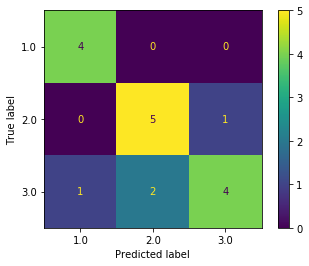

In [295]:
plot_confusion_matrix(Decision_Tree,X_test, y_test)

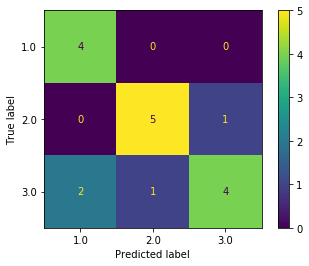

In [296]:
plot_confusion_matrix(Random_Forest,X_test, y_test)

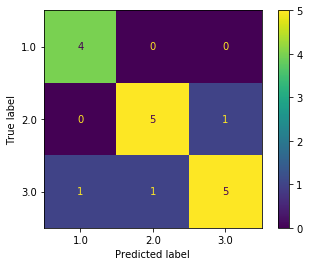

In [297]:
plot_confusion_matrix(Gradient_Boost,X_test, y_test)

In [298]:
Test=principalDf[85:].drop(['Cluster'],1)
Test

,A,B,C,D,E,F,G,H,I,J
85,-3448.329061,-0.444313,0.429735,0.256011,-0.166993,-0.165879,0.014814,-0.010074,-0.026954,-0.032948
86,713.991829,0.280419,0.059956,0.005345,-0.001285,-0.008609,0.028487,0.039414,-0.011524,0.004199
87,2500.826812,-0.164736,0.527181,0.102848,0.146837,-0.023001,0.170541,-0.130472,-0.088289,0.148680
88,2004.289621,0.306110,0.053187,-0.000371,0.040278,-0.032524,0.178141,0.065935,-0.058502,-0.038990
89,2078.307835,0.465599,-0.006630,0.146061,0.026307,0.006535,0.006440,-0.005245,-0.005768,-0.005653
90,-4488.213695,-0.258311,0.086254,0.004733,0.219196,0.022311,-0.063464,0.038249,-0.069816,0.019361
91,3096.700436,0.252179,-0.051255,-0.148939,0.082459,0.063877,0.209002,0.051804,-0.055218,-0.056276
92,-2335.298003,-0.087533,0.023568,-0.153997,0.269145,0.071133,-0.074750,0.108067,0.014787,0.053344
93,-1106.912577,0.448066,-0.185107,-0.002967,-0.035371,0.142964,-0.035922,0.030155,-0.047404,-0.105714
94,-2878.901995,0.059973,-0.108999,-0.195520,0.030218,0.064549,0.179652,-0.080100,-0.050462,-0.111705


In [299]:
Prediction=Gradient_Boost.predict(Test)
Prediction

array([3., 2., 2., 2., 2., 1., 2., 1., 2., 2.])

In [300]:
Store_Test=data1[85:]
New_Stores=Store_Test['Store']
Stores_Prediction=pd.DataFrame(Prediction,Store_Test['Store'])
Stores_Prediction

,0
Store,
S0086,3.0
S0087,2.0
S0088,2.0
S0089,2.0
S0090,2.0
S0091,1.0
S0092,2.0
S0093,1.0
S0094,2.0
